# **Load data set & Get idea**

In [260]:
import pandas as pd


data = pd.read_csv("https://raw.githubusercontent.com/vihanga-induwara/CM2604-CW-Bank-Marketing/refs/heads/main/bank%2Bmarketing/bank-additional/bank-additional/bank-additional-full.csv", sep=";")


In [261]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [262]:
# Check column names and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [263]:
# Check for missing values
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [264]:
# Summary statistics
print(data.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

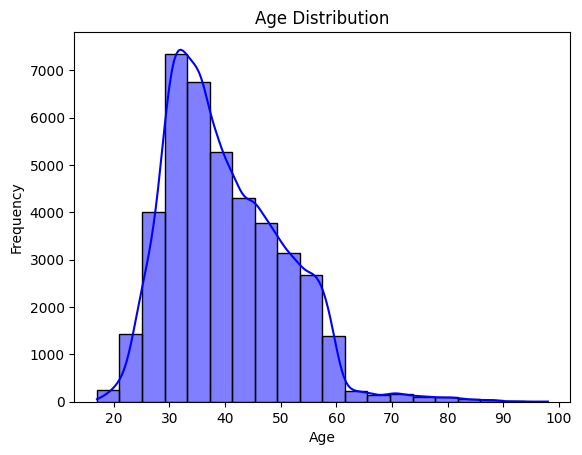

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
sns.histplot(data['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-266-1dfeb1f79179>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='pastel')


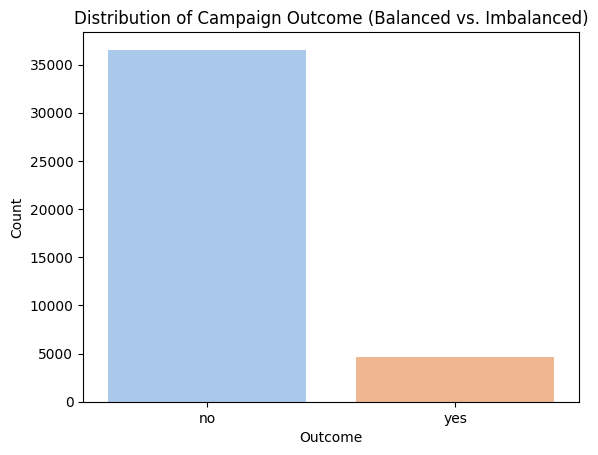

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for target variable
sns.countplot(x='y', data=data, palette='pastel')
plt.title('Distribution of Campaign Outcome (Balanced vs. Imbalanced)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


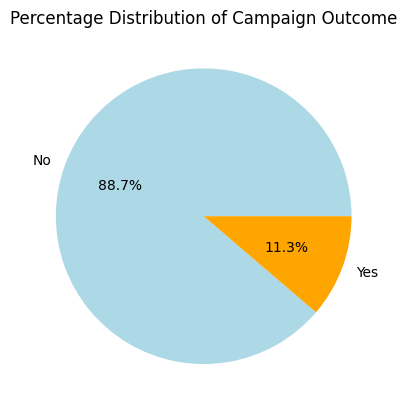

In [267]:
# Calculate percentage distribution
outcome_counts = data['y'].value_counts(normalize=True) * 100
print(outcome_counts)

# Visualize as a pie chart
outcome_counts.plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'], colors=['lightblue', 'orange'])
plt.title('Percentage Distribution of Campaign Outcome')
plt.ylabel('')  # Remove y-axis label
plt.show()


# **Preprocess Data**

## **idea of data**

In [268]:

# Display column details: type and number of unique categories
for column in data.columns:
    print(f"Column: {column}")
    print(f"Type: {data[column].dtype}")
    print(f"Number of unique values: {data[column].nunique()}")

    # If the column is categorical, print the unique values (categories)
    if data[column].dtype == 'object':
        print(f"Categories: {data[column].unique()}")
    print("-" * 40)


Column: age
Type: int64
Number of unique values: 78
----------------------------------------
Column: job
Type: object
Number of unique values: 12
Categories: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------------------
Column: marital
Type: object
Number of unique values: 4
Categories: ['married' 'single' 'divorced' 'unknown']
----------------------------------------
Column: education
Type: object
Number of unique values: 8
Categories: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------------------
Column: default
Type: object
Number of unique values: 3
Categories: ['no' 'unknown' 'yes']
----------------------------------------
Column: housing
Type: object
Number of unique values: 3
Categories: ['no' 'yes' 'unknown']
----------------------------------------
Column: lo

## **age**

In [269]:

data["age"].value_counts()

,count
age,
31,1947
32,1846
33,1833
36,1780
35,1759
...,...
89,2
91,2
94,1


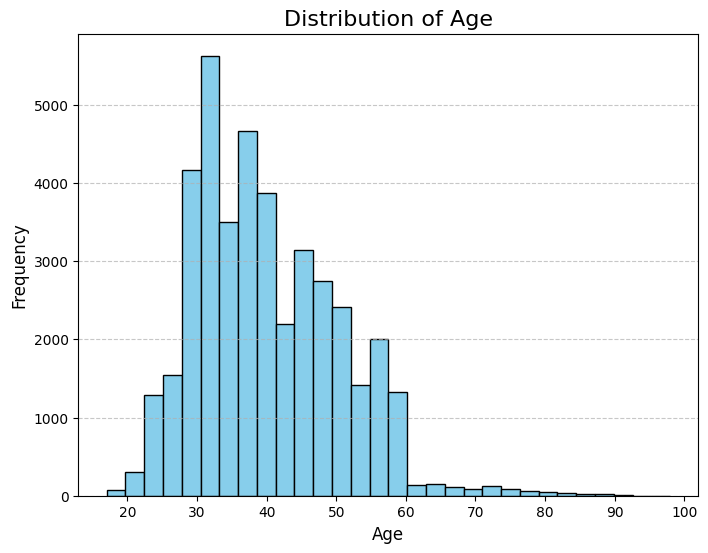

In [270]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data["age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [271]:
import pandas as pd

# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Filter the data to exclude outliers
data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# Print the shape of the dataset before and after removing outliers
print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers: {data.shape}")


Lower Bound: 9.5, Upper Bound: 69.5
Original data shape: (40719, 21)
Data shape after removing outliers: (40719, 21)


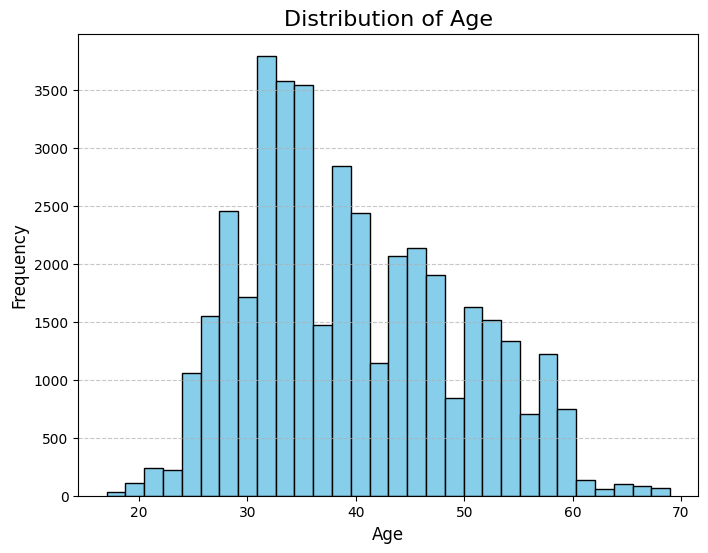

In [272]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data["age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [273]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler instance
scaler = MinMaxScaler()

# Normalize the 'age' column
data['age'] = scaler.fit_transform(data[['age']])

# Display the first few rows of the normalized column
print(data[['age']].head())


        age
0  0.750000
1  0.769231
2  0.384615
3  0.442308
4  0.750000


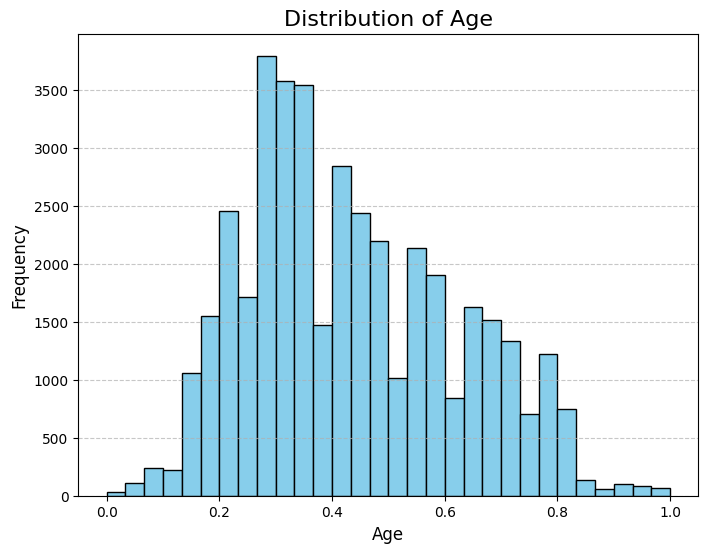

In [274]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data["age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **job**

In [275]:

data["job"].value_counts()

,count
job,
admin.,10414
blue-collar,9251
technician,6742
services,3969
management,2918
entrepreneur,1456
self-employed,1420
retired,1301
housemaid,1035


In [276]:
import pandas as pd

# Assuming you have a DataFrame called 'data'
data_encoded = pd.get_dummies(data['job'], prefix='job', drop_first=False)

# If you want to concatenate it with the original dataframe
data = pd.concat([data, data_encoded], axis=1)

# Display the first few rows of the updated dataframe
print(data.head())


        age        job  marital    education  default housing loan    contact  \
0  0.750000  housemaid  married     basic.4y       no      no   no  telephone   
1  0.769231   services  married  high.school  unknown      no   no  telephone   
2  0.384615   services  married  high.school       no     yes   no  telephone   
3  0.442308     admin.  married     basic.6y       no      no   no  telephone   
4  0.750000   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  job_entrepreneur  job_housemaid  job_management  \
0   may         mon  ...             False           True           False   
1   may         mon  ...             False          False           False   
2   may         mon  ...             False          False           False   
3   may         mon  ...             False          False           False   
4   may         mon  ...             False          False           False   

   job_retired job_self-employed  job_services  jo

In [336]:
# Drop the 'job' column in-place
data.drop(columns=['job'], inplace=True)

# Verify if the column is removed
print(data.head())


        age  duration  campaign  emp.var.rate  cons.price.idx   y  job_admin.  \
0  0.750000  0.053070       0.0      0.636472        0.698753  no       False   
1  0.769231  0.030297       0.0      0.636472        0.698753  no       False   
2  0.384615  0.045954       0.0      0.636472        0.698753  no       False   
3  0.442308  0.030704       0.0      0.636472        0.698753  no        True   
4  0.750000  0.062424       0.0      0.636472        0.698753  no       False   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jul  \
0            False             False           True  ...      False   
1            False             False          False  ...      False   
2            False             False          False  ...      False   
3            False             False          False  ...      False   
4            False             False          False  ...      False   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0      False   

## **marital**

In [277]:
data["marital"].value_counts()

,count
marital,
married,24610
single,11553
divorced,4476
unknown,80


In [278]:
# Replace unknown with the most frequent category
most_frequent_marital = data['marital'].mode()[0]
data['marital'].replace('unknown', most_frequent_marital, inplace=True)


<ipython-input-278-e089c0016540>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['marital'].replace('unknown', most_frequent_marital, inplace=True)


In [279]:
data["marital"].value_counts()

,count
marital,
married,24690
single,11553
divorced,4476


In [280]:
# One-hot encode the 'marital' column
data = pd.get_dummies(data, columns=['marital'], drop_first=False)

# Check the result
print(data.head())


        age        job    education  default housing loan    contact month  \
0  0.750000  housemaid     basic.4y       no      no   no  telephone   may   
1  0.769231   services  high.school  unknown      no   no  telephone   may   
2  0.384615   services  high.school       no     yes   no  telephone   may   
3  0.442308     admin.     basic.6y       no      no   no  telephone   may   
4  0.750000   services  high.school       no      no  yes  telephone   may   

  day_of_week  duration  ...  job_retired  job_self-employed  job_services  \
0         mon       261  ...        False              False         False   
1         mon       149  ...        False              False          True   
2         mon       226  ...        False              False          True   
3         mon       151  ...        False              False         False   
4         mon       307  ...        False              False          True   

  job_student  job_technician  job_unemployed  job_unknown  ma

## **education**

In [281]:

data["education"].value_counts()

,count
education,
university.degree,12105
high.school,9481
basic.9y,6018
professional.course,5201
basic.4y,3935
basic.6y,2279
unknown,1683
illiterate,17


In [282]:
# Find the most frequent category in the 'education' column
most_frequent_education = data['education'].mode()[0]

# Replace 'illiterate' with the most frequent category
data['education'] = data['education'].replace('illiterate', most_frequent_education)




In [283]:
# Check the value counts after replacement
print(data['education'].value_counts())

education
university.degree      12122
high.school             9481
basic.9y                6018
professional.course     5201
basic.4y                3935
basic.6y                2279
unknown                 1683
Name: count, dtype: int64


In [284]:
# One-hot encode the 'education' column
education_encoded = pd.get_dummies(data['education'], prefix='education')

# Join the one-hot encoded columns back to the original DataFrame
data = pd.concat([data, education_encoded], axis=1)

# Drop the original 'education' column
data.drop('education', axis=1, inplace=True)

# Print the updated DataFrame
print(data.head())


        age        job  default housing loan    contact month day_of_week  \
0  0.750000  housemaid       no      no   no  telephone   may         mon   
1  0.769231   services  unknown      no   no  telephone   may         mon   
2  0.384615   services       no     yes   no  telephone   may         mon   
3  0.442308     admin.       no      no   no  telephone   may         mon   
4  0.750000   services       no      no  yes  telephone   may         mon   

   duration  campaign  ...  marital_divorced  marital_married marital_single  \
0       261         1  ...             False             True          False   
1       149         1  ...             False             True          False   
2       226         1  ...             False             True          False   
3       151         1  ...             False             True          False   
4       307         1  ...             False             True          False   

   education_basic.4y  education_basic.6y  education_bas

## **default**

In [285]:

data["default"].value_counts()

,count
default,
no,32162
unknown,8554
yes,3


In [286]:
# Drop the 'default' column if it doesn't provide useful information
data = data.drop('default', axis=1)

# Check the remaining columns
print(data.columns)


Index(['age', 'job', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'education_unknown'],
      dtype='object')


## **housing**

In [287]:

data["housing"].value_counts()

,count
housing,
yes,21319
no,18419
unknown,981


In [288]:
# Replace 'unknown' with the most frequent value ('yes')
data['housing'] = data['housing'].replace('unknown', 'yes')

# Check the updated value counts
print(data['housing'].value_counts())


housing
yes    22300
no     18419
Name: count, dtype: int64


In [289]:
# One-hot encode the 'housing' column
housing_encoded = pd.get_dummies(data['housing'], prefix='housing')

# Join the encoded columns back to the original dataframe
data = pd.concat([data, housing_encoded], axis=1)

# Drop the original 'housing' column if it's no longer needed
data = data.drop(columns=['housing'])

# Check the updated dataframe
print(data.head())


        age        job loan    contact month day_of_week  duration  campaign  \
0  0.750000  housemaid   no  telephone   may         mon       261         1   
1  0.769231   services   no  telephone   may         mon       149         1   
2  0.384615   services   no  telephone   may         mon       226         1   
3  0.442308     admin.   no  telephone   may         mon       151         1   
4  0.750000   services  yes  telephone   may         mon       307         1   

   pdays  previous  ... marital_single  education_basic.4y  \
0    999         0  ...          False                True   
1    999         0  ...          False               False   
2    999         0  ...          False               False   
3    999         0  ...          False               False   
4    999         0  ...          False               False   

   education_basic.6y  education_basic.9y  education_high.school  \
0               False               False                  False   
1         

## **loan**

In [290]:

data["loan"].value_counts()

,count
loan,
no,33560
yes,6178
unknown,981


In [291]:
# Replace 'unknown' with the most frequent value ('yes')
data['loan'] = data['loan'].replace('unknown', 'yes')

# Check the updated value counts
print(data['loan'].value_counts())


loan
no     33560
yes     7159
Name: count, dtype: int64


In [292]:
# One-hot encode the 'loan' column
loan_encoded = pd.get_dummies(data['loan'], prefix='loan')

# Join the encoded columns back to the original dataframe
data = pd.concat([data, loan_encoded], axis=1)

# Drop the original 'loan' column if it's no longer needed
data = data.drop(columns=['loan'])

# Check the updated dataframe
print(data.head())


        age        job    contact month day_of_week  duration  campaign  \
0  0.750000  housemaid  telephone   may         mon       261         1   
1  0.769231   services  telephone   may         mon       149         1   
2  0.384615   services  telephone   may         mon       226         1   
3  0.442308     admin.  telephone   may         mon       151         1   
4  0.750000   services  telephone   may         mon       307         1   

   pdays  previous     poutcome  ...  education_basic.6y  education_basic.9y  \
0    999         0  nonexistent  ...               False               False   
1    999         0  nonexistent  ...               False               False   
2    999         0  nonexistent  ...               False               False   
3    999         0  nonexistent  ...                True               False   
4    999         0  nonexistent  ...               False               False   

   education_high.school  education_professional.course  \
0        

## **contact**

In [293]:

data["contact"].value_counts()

,count
contact,
cellular,25724
telephone,14995


In [294]:
# Drop the 'contact' column
data = data.drop(columns=['contact'])

# Check the updated dataframe
print(data.head())


        age        job month day_of_week  duration  campaign  pdays  previous  \
0  0.750000  housemaid   may         mon       261         1    999         0   
1  0.769231   services   may         mon       149         1    999         0   
2  0.384615   services   may         mon       226         1    999         0   
3  0.442308     admin.   may         mon       151         1    999         0   
4  0.750000   services   may         mon       307         1    999         0   

      poutcome  emp.var.rate  ...  education_basic.6y  education_basic.9y  \
0  nonexistent           1.1  ...               False               False   
1  nonexistent           1.1  ...               False               False   
2  nonexistent           1.1  ...               False               False   
3  nonexistent           1.1  ...                True               False   
4  nonexistent           1.1  ...               False               False   

   education_high.school  education_professional.c

## **month**

In [295]:

data["month"].value_counts()

,count
month,
may,13736
jul,7141
aug,6091
jun,5301
nov,4064
apr,2562
oct,648
sep,513
mar,503


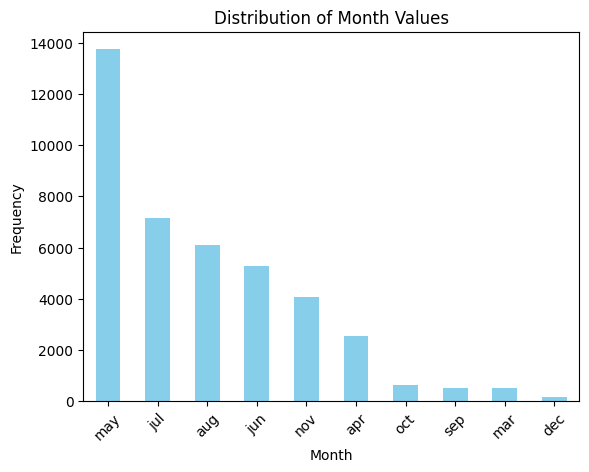

In [296]:
import matplotlib.pyplot as plt

# Plot the value counts of the 'month' column
data['month'].value_counts().plot(kind='bar', color='skyblue')

# Set labels and title
plt.title('Distribution of Month Values')
plt.xlabel('Month')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45)
plt.show()


In [297]:
import pandas as pd

# Assuming 'data' is your DataFrame
data = pd.get_dummies(data, columns=['month'], drop_first=False)

# Display the transformed data to check the result
print(data.head())


        age        job day_of_week  duration  campaign  pdays  previous  \
0  0.750000  housemaid         mon       261         1    999         0   
1  0.769231   services         mon       149         1    999         0   
2  0.384615   services         mon       226         1    999         0   
3  0.442308     admin.         mon       151         1    999         0   
4  0.750000   services         mon       307         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  ...  month_apr  month_aug  \
0  nonexistent           1.1          93.994  ...      False      False   
1  nonexistent           1.1          93.994  ...      False      False   
2  nonexistent           1.1          93.994  ...      False      False   
3  nonexistent           1.1          93.994  ...      False      False   
4  nonexistent           1.1          93.994  ...      False      False   

   month_dec month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0      False     

## **day_of_week**

In [298]:

data["day_of_week"].value_counts()

,count
day_of_week,
thu,8522
mon,8426
wed,8052
tue,7980
fri,7739


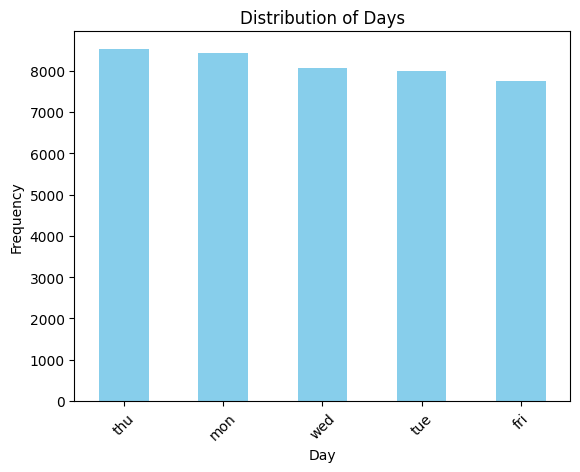

In [299]:
import matplotlib.pyplot as plt

# Plot the value counts of the 'day_of_week' column
data['day_of_week'].value_counts().plot(kind='bar', color='skyblue')

# Set labels and title
plt.title('Distribution of Days')
plt.xlabel('Day')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45)
plt.show()


In [300]:
# Drop the 'day_of_week' column in-place
data.drop(columns=['day_of_week'], inplace=True)

# Verify if the column is removed
print(data.head())


        age        job  duration  campaign  pdays  previous     poutcome  \
0  0.750000  housemaid       261         1    999         0  nonexistent   
1  0.769231   services       149         1    999         0  nonexistent   
2  0.384615   services       226         1    999         0  nonexistent   
3  0.442308     admin.       151         1    999         0  nonexistent   
4  0.750000   services       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  ...  month_apr  month_aug  \
0           1.1          93.994          -36.4  ...      False      False   
1           1.1          93.994          -36.4  ...      False      False   
2           1.1          93.994          -36.4  ...      False      False   
3           1.1          93.994          -36.4  ...      False      False   
4           1.1          93.994          -36.4  ...      False      False   

  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \

## **duration**

In [301]:

data["duration"].value_counts()

,count
duration,
85,168
136,167
90,167
73,166
124,163
...,...
1275,1
1473,1
1432,1


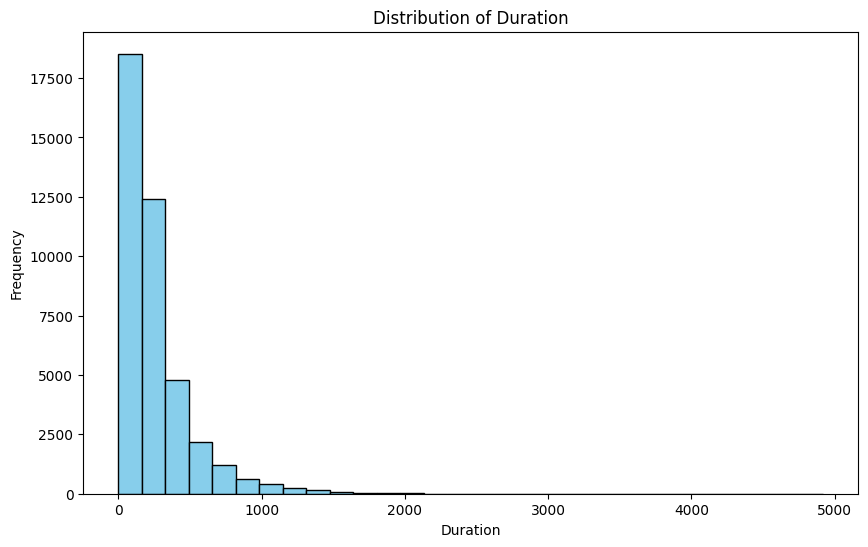

In [302]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'duration' column
plt.figure(figsize=(10, 6))
plt.hist(data['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


In [303]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the data as it is a single column
scaler = MinMaxScaler()
data['duration'] = scaler.fit_transform(data[['duration']])

# Check the result
print(data[['duration']].head())


   duration
0  0.053070
1  0.030297
2  0.045954
3  0.030704
4  0.062424


## **campaign**

In [304]:

data["campaign"].value_counts()

,count
campaign,
1,17388
2,10444
3,5300
4,2631
5,1594
6,970
7,624
8,396
9,280


In [305]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the data as it is a single column
scaler = MinMaxScaler()
data['campaign'] = scaler.fit_transform(data[['campaign']])

# Check the result
print(data[['campaign']].head())


   campaign
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0


In [306]:

data["campaign"].value_counts()

,count
campaign,
0.000000,17388
0.018182,10444
0.036364,5300
0.054545,2631
0.072727,1594
0.090909,970
0.109091,624
0.127273,396
0.145455,280


## **pdays**

In [307]:

data["pdays"].value_counts()

,count
pdays,
999,39302
3,399
6,382
4,111
9,60
2,60
12,56
7,55
10,51


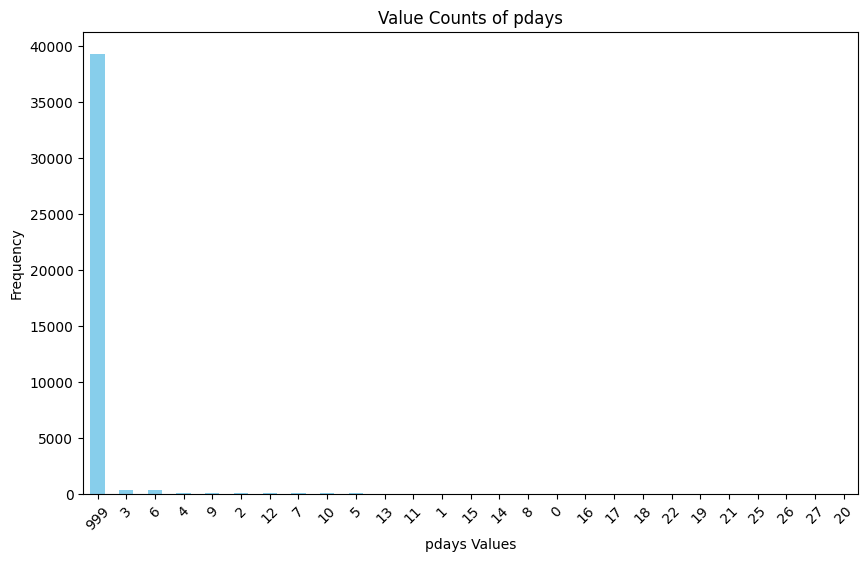

In [308]:
import matplotlib.pyplot as plt

# Get the value counts of the 'pdays' column
pdays_counts = data["pdays"].value_counts()

# Plot the result
pdays_counts.plot(kind='bar', figsize=(10,6), color='skyblue')

# Adding labels and title
plt.xlabel('pdays Values')
plt.ylabel('Frequency')
plt.title('Value Counts of pdays')
plt.xticks(rotation=45)
plt.show()


In [309]:
# Drop the 'pdays' column
data = data.drop(columns=['pdays'])
print(data.head())

        age        job  duration  campaign  previous     poutcome  \
0  0.750000  housemaid  0.053070       0.0         0  nonexistent   
1  0.769231   services  0.030297       0.0         0  nonexistent   
2  0.384615   services  0.045954       0.0         0  nonexistent   
3  0.442308     admin.  0.030704       0.0         0  nonexistent   
4  0.750000   services  0.062424       0.0         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  ...  month_apr  \
0           1.1          93.994          -36.4      4.857  ...      False   
1           1.1          93.994          -36.4      4.857  ...      False   
2           1.1          93.994          -36.4      4.857  ...      False   
3           1.1          93.994          -36.4      4.857  ...      False   
4           1.1          93.994          -36.4      4.857  ...      False   

  month_aug  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
0     False      False      False      Fa

## **previous**

In [310]:

data["previous"].value_counts()

,count
previous,
0,35296
1,4439
2,700
3,200
4,61
5,18
6,4
7,1


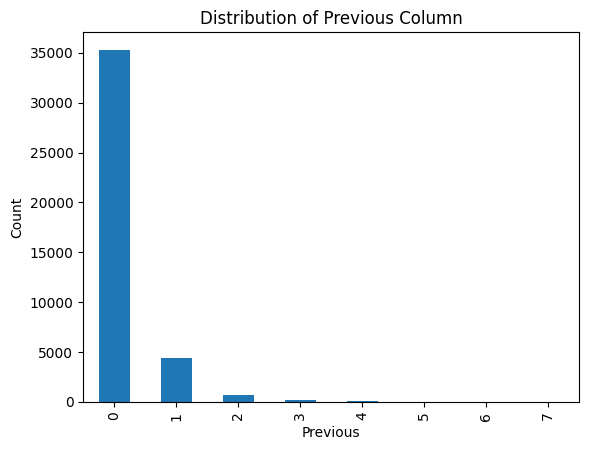

In [311]:
import matplotlib.pyplot as plt

# Plot the value counts for the 'previous' column
data['previous'].value_counts().sort_index().plot(kind='bar')

# Adding labels and title
plt.xlabel('Previous')
plt.ylabel('Count')
plt.title('Distribution of Previous Column')

# Show the plot
plt.show()


In [312]:
# Drop the 'pdays' column
data = data.drop(columns=['previous'])
print(data.head())

        age        job  duration  campaign     poutcome  emp.var.rate  \
0  0.750000  housemaid  0.053070       0.0  nonexistent           1.1   
1  0.769231   services  0.030297       0.0  nonexistent           1.1   
2  0.384615   services  0.045954       0.0  nonexistent           1.1   
3  0.442308     admin.  0.030704       0.0  nonexistent           1.1   
4  0.750000   services  0.062424       0.0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ... month_apr  \
0          93.994          -36.4      4.857       5191.0  ...     False   
1          93.994          -36.4      4.857       5191.0  ...     False   
2          93.994          -36.4      4.857       5191.0  ...     False   
3          93.994          -36.4      4.857       5191.0  ...     False   
4          93.994          -36.4      4.857       5191.0  ...     False   

   month_aug  month_dec  month_jul  month_jun  month_mar  month_may  \
0      False      False      False     

## **poutcome**

In [313]:

data["poutcome"].value_counts()

,count
poutcome,
nonexistent,35296
failure,4141
success,1282


In [314]:
# Drop the 'pdays' column
data = data.drop(columns=['poutcome'])
print(data.head())

        age        job  duration  campaign  emp.var.rate  cons.price.idx  \
0  0.750000  housemaid  0.053070       0.0           1.1          93.994   
1  0.769231   services  0.030297       0.0           1.1          93.994   
2  0.384615   services  0.045954       0.0           1.1          93.994   
3  0.442308     admin.  0.030704       0.0           1.1          93.994   
4  0.750000   services  0.062424       0.0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  ...  month_apr  month_aug  \
0          -36.4      4.857       5191.0  no  ...      False      False   
1          -36.4      4.857       5191.0  no  ...      False      False   
2          -36.4      4.857       5191.0  no  ...      False      False   
3          -36.4      4.857       5191.0  no  ...      False      False   
4          -36.4      4.857       5191.0  no  ...      False      False   

   month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
0      False      Fal

## **emp.var.rate**

In [315]:

data["emp.var.rate"].value_counts()

,count
emp.var.rate,
1.4,16234
-1.8,9038
1.1,7763
-0.1,3683
-2.9,1591
-3.4,949
-1.7,708
-1.1,593
-3.0,150


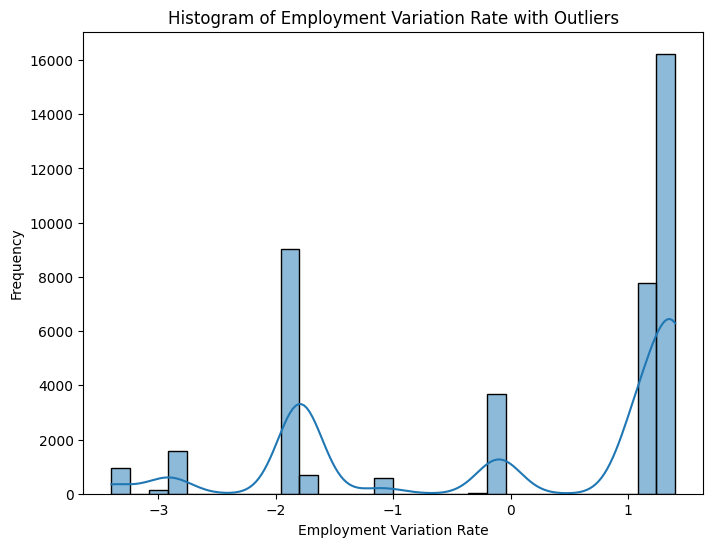

In [316]:
plt.figure(figsize=(8, 6))
sns.histplot(data['emp.var.rate'], kde=True, bins=30)  # kde=True adds a Kernel Density Estimate
plt.title('Histogram of Employment Variation Rate with Outliers')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Frequency')
plt.show()


In [317]:
from sklearn.preprocessing import StandardScaler

# Normalize the 'emp.var.rate' column using StandardScaler
scaler = StandardScaler()
data['emp.var.rate'] = scaler.fit_transform(data[['emp.var.rate']])


In [318]:

data["emp.var.rate"].value_counts()

,count
emp.var.rate,
0.829355,16234
-1.228066,9038
0.636472,7763
-0.135061,3683
-1.935304,1591
-2.256776,949
-1.163771,708
-0.778005,593
-1.999598,150


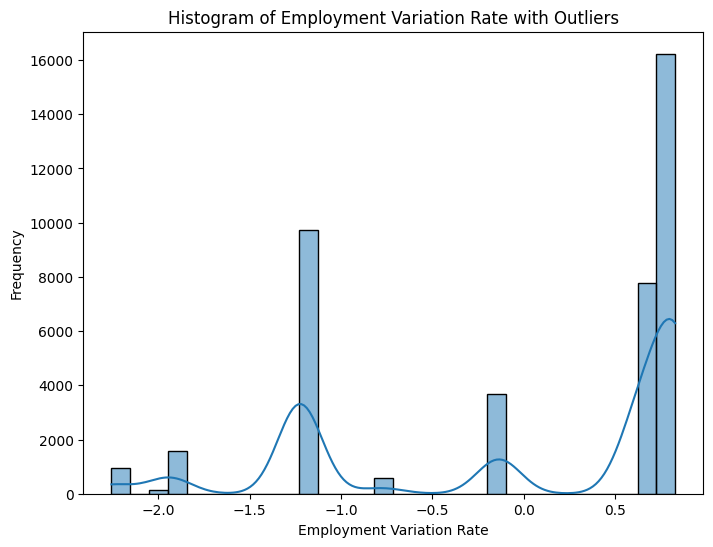

In [319]:
plt.figure(figsize=(8, 6))
sns.histplot(data['emp.var.rate'], kde=True, bins=30)  # kde=True adds a Kernel Density Estimate
plt.title('Histogram of Employment Variation Rate with Outliers')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Frequency')
plt.show()


## **cons.price.idx**

In [320]:

data["cons.price.idx"].value_counts()

,count
cons.price.idx,
93.994,7763
93.918,6685
92.893,5785
93.444,5175
94.465,4374
93.200,3616
93.075,2418
92.963,710
92.201,704


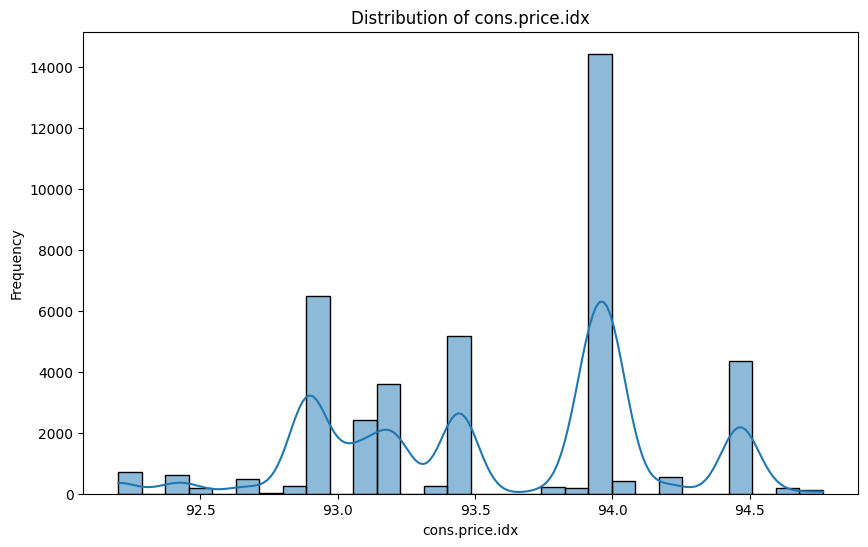

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(data['cons.price.idx'], kde=True, bins=30)
plt.title('Distribution of cons.price.idx')
plt.xlabel('cons.price.idx')
plt.ylabel('Frequency')
plt.show()


In [322]:
Q1 = data['cons.price.idx'].quantile(0.25)
Q3 = data['cons.price.idx'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = data[(data['cons.price.idx'] < (Q1 - 1.5 * IQR)) | (data['cons.price.idx'] > (Q3 + 1.5 * IQR))]

# Print the outliers
print(outliers)


Empty DataFrame
Columns: [age, job, duration, campaign, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y, job_admin., job_blue-collar, job_entrepreneur, job_housemaid, job_management, job_retired, job_self-employed, job_services, job_student, job_technician, job_unemployed, job_unknown, marital_divorced, marital_married, marital_single, education_basic.4y, education_basic.6y, education_basic.9y, education_high.school, education_professional.course, education_university.degree, education_unknown, housing_no, housing_yes, loan_no, loan_yes, month_apr, month_aug, month_dec, month_jul, month_jun, month_mar, month_may, month_nov, month_oct, month_sep]
Index: []

[0 rows x 46 columns]


In [323]:
# Remove outliers
data_no_outliers = data[(data['cons.price.idx'] >= (Q1 - 1.5 * IQR)) & (data['cons.price.idx'] <= (Q3 + 1.5 * IQR))]

# Verify the data without outliers
print(data_no_outliers.head())


        age        job  duration  campaign  emp.var.rate  cons.price.idx  \
0  0.750000  housemaid  0.053070       0.0      0.636472          93.994   
1  0.769231   services  0.030297       0.0      0.636472          93.994   
2  0.384615   services  0.045954       0.0      0.636472          93.994   
3  0.442308     admin.  0.030704       0.0      0.636472          93.994   
4  0.750000   services  0.062424       0.0      0.636472          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  ...  month_apr  month_aug  \
0          -36.4      4.857       5191.0  no  ...      False      False   
1          -36.4      4.857       5191.0  no  ...      False      False   
2          -36.4      4.857       5191.0  no  ...      False      False   
3          -36.4      4.857       5191.0  no  ...      False      False   
4          -36.4      4.857       5191.0  no  ...      False      False   

   month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
0      False      Fal

In [324]:
# Value counts for cons.price.idx
print(data['cons.price.idx'].value_counts())


cons.price.idx
93.994    7763
93.918    6685
92.893    5785
93.444    5175
94.465    4374
93.200    3616
93.075    2418
92.963     710
92.201     704
92.431     392
92.649     322
94.215     279
94.199     278
92.843     254
93.369     249
92.379     235
94.055     217
94.027     212
94.601     189
93.876     188
92.469     177
92.713     150
93.749     144
94.767     126
93.798      67
92.756      10
Name: count, dtype: int64


In [325]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the data (as it should be a 2D array for scaling)
data['cons.price.idx'] = scaler.fit_transform(data[['cons.price.idx']])

# Check the normalized values
print(data[['cons.price.idx']].head())


   cons.price.idx
0        0.698753
1        0.698753
2        0.698753
3        0.698753
4        0.698753


## **cons.conf.idx**

In [326]:

data["cons.conf.idx"].value_counts()

,count
cons.conf.idx,
-36.4,7763
-42.7,6685
-46.2,5785
-36.1,5175
-41.8,4374
-42.0,3616
-47.1,2418
-40.8,710
-31.4,704


In [327]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the data (as it should be a 2D array for scaling)
data['cons.conf.idx_normalized'] = scaler.fit_transform(data[['cons.conf.idx']])

# Check the normalized values
print(data[['cons.conf.idx', 'cons.conf.idx_normalized']].head())


   cons.conf.idx  cons.conf.idx_normalized
0          -36.4                   0.60251
1          -36.4                   0.60251
2          -36.4                   0.60251
3          -36.4                   0.60251
4          -36.4                   0.60251


In [328]:
# Drop the 'cons.conf.idx' column
data = data.drop(columns=['cons.conf.idx'])
print(data.head())

        age        job  duration  campaign  emp.var.rate  cons.price.idx  \
0  0.750000  housemaid  0.053070       0.0      0.636472        0.698753   
1  0.769231   services  0.030297       0.0      0.636472        0.698753   
2  0.384615   services  0.045954       0.0      0.636472        0.698753   
3  0.442308     admin.  0.030704       0.0      0.636472        0.698753   
4  0.750000   services  0.062424       0.0      0.636472        0.698753   

   euribor3m  nr.employed   y  job_admin.  ...  month_aug  month_dec  \
0      4.857       5191.0  no       False  ...      False      False   
1      4.857       5191.0  no       False  ...      False      False   
2      4.857       5191.0  no       False  ...      False      False   
3      4.857       5191.0  no        True  ...      False      False   
4      4.857       5191.0  no       False  ...      False      False   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0      False      False      False     

## **euribor3m**

In [329]:

data["euribor3m"].value_counts()

,count
euribor3m,
4.857,2868
4.962,2613
4.963,2487
4.961,1902
4.856,1210
...,...
3.743,1
3.282,1
3.669,1


In [330]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the data (since MinMaxScaler expects 2D data)
data['euribor3m_normalized'] = scaler.fit_transform(data[['euribor3m']])

# Check the normalized values
print(data[['euribor3m', 'euribor3m_normalized']].head())


   euribor3m  euribor3m_normalized
0      4.857              0.957379
1      4.857              0.957379
2      4.857              0.957379
3      4.857              0.957379
4      4.857              0.957379


In [331]:
# Drop the 'euribor3m' column
data = data.drop(columns=['euribor3m'])
print(data.head())

        age        job  duration  campaign  emp.var.rate  cons.price.idx  \
0  0.750000  housemaid  0.053070       0.0      0.636472        0.698753   
1  0.769231   services  0.030297       0.0      0.636472        0.698753   
2  0.384615   services  0.045954       0.0      0.636472        0.698753   
3  0.442308     admin.  0.030704       0.0      0.636472        0.698753   
4  0.750000   services  0.062424       0.0      0.636472        0.698753   

   nr.employed   y  job_admin.  job_blue-collar  ...  month_dec  month_jul  \
0       5191.0  no       False            False  ...      False      False   
1       5191.0  no       False            False  ...      False      False   
2       5191.0  no       False            False  ...      False      False   
3       5191.0  no        True            False  ...      False      False   
4       5191.0  no       False            False  ...      False      False   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0  

## **nr.employed**

In [332]:

data["nr.employed"].value_counts()

,count
nr.employed,
5228.1,16234
5099.1,8457
5191.0,7763
5195.8,3683
5076.2,1591
5017.5,949
4991.6,708
4963.6,593
5008.7,581


In [333]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the data (since MinMaxScaler expects 2D data)
data['nr.employed_normalized'] = scaler.fit_transform(data[['nr.employed']])

# Check the normalized values
print(data[['nr.employed', 'nr.employed_normalized']].head())


   nr.employed  nr.employed_normalized
0       5191.0                0.859735
1       5191.0                0.859735
2       5191.0                0.859735
3       5191.0                0.859735
4       5191.0                0.859735


In [334]:
# Drop the 'nr.employed' column
data = data.drop(columns=['nr.employed'])
print(data.head())

        age        job  duration  campaign  emp.var.rate  cons.price.idx   y  \
0  0.750000  housemaid  0.053070       0.0      0.636472        0.698753  no   
1  0.769231   services  0.030297       0.0      0.636472        0.698753  no   
2  0.384615   services  0.045954       0.0      0.636472        0.698753  no   
3  0.442308     admin.  0.030704       0.0      0.636472        0.698753  no   
4  0.750000   services  0.062424       0.0      0.636472        0.698753  no   

   job_admin.  job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  \
0       False            False             False  ...      False      False   
1       False            False             False  ...      False      False   
2       False            False             False  ...      False      False   
3        True            False             False  ...      False      False   
4       False            False             False  ...      False      False   

   month_mar  month_may  month_nov  month_oc

## **Y**

In [340]:
# Encode the 'y' column
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Verify the encoding
print(data['y'].value_counts())


y
0    36300
1     4419
Name: count, dtype: int64


## **After Colum wised prepoesed**

In [337]:
data

,age,duration,campaign,emp.var.rate,cons.price.idx,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,cons.conf.idx_normalized,euribor3m_normalized,nr.employed_normalized
0,0.750000,0.053070,0.000000,0.636472,0.698753,no,False,False,False,True,...,False,False,False,True,False,False,False,0.60251,0.957379,0.859735
1,0.769231,0.030297,0.000000,0.636472,0.698753,no,False,False,False,False,...,False,False,False,True,False,False,False,0.60251,0.957379,0.859735
2,0.384615,0.045954,0.000000,0.636472,0.698753,no,False,False,False,False,...,False,False,False,True,False,False,False,0.60251,0.957379,0.859735
3,0.442308,0.030704,0.000000,0.636472,0.698753,no,True,False,False,False,...,False,False,False,True,False,False,False,0.60251,0.957379,0.859735
4,0.750000,0.062424,0.000000,0.636472,0.698753,no,False,False,False,False,...,False,False,False,True,False,False,False,0.60251,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0.384615,0.057137,0.000000,-0.778005,1.000000,yes,True,False,False,False,...,False,False,False,False,True,False,False,0.00000,0.089322,0.000000
41182,0.230769,0.022773,0.000000,-0.778005,1.000000,no,False,False,False,False,...,False,False,False,False,True,False,False,0.00000,0.089322,0.000000
41184,0.557692,0.077877,0.000000,-0.778005,1.000000,no,False,True,False,False,...,False,False,False,False,True,False,False,0.00000,0.089322,0.000000
41185,0.750000,0.038430,0.018182,-0.778005,1.000000,no,False,False,False,False,...,False,False,False,False,True,False,False,0.00000,0.089322,0.000000


In [341]:
# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)  # Show all columns
print(data.head())  # Display the first few rows

        age  duration  campaign  emp.var.rate  cons.price.idx  y  job_admin.  \
0  0.750000  0.053070       0.0      0.636472        0.698753  0       False   
1  0.769231  0.030297       0.0      0.636472        0.698753  0       False   
2  0.384615  0.045954       0.0      0.636472        0.698753  0       False   
3  0.442308  0.030704       0.0      0.636472        0.698753  0        True   
4  0.750000  0.062424       0.0      0.636472        0.698753  0       False   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0            False             False           True           False   
1            False             False          False           False   
2            False             False          False           False   
3            False             False          False           False   
4            False             False          False           False   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0        Fal

## **handle data set imbalance**

In [342]:
# Import libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into features (X) and target variable (y)
X = data.drop(columns=['y'])
y = data['y']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Before SMOTE: Counter({0: 29040, 1: 3535})
After SMOTE: Counter({0: 29040, 1: 29040})


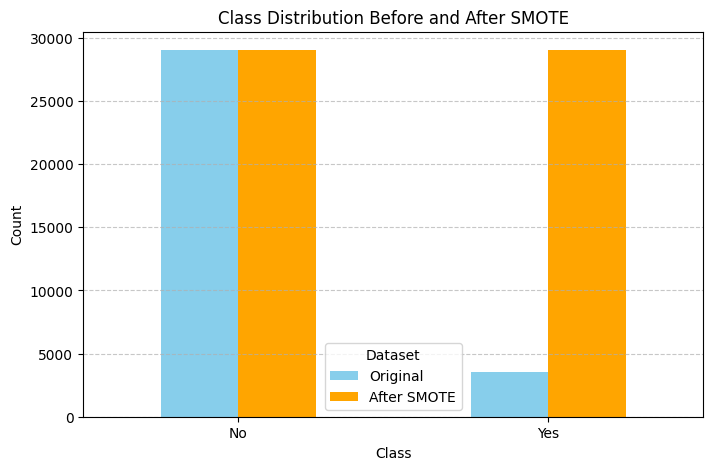

In [344]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Before SMOTE
original_counts = Counter(y_train)

# After SMOTE
resampled_counts = Counter(y_train_resampled)

# Create a DataFrame for visualization
df = pd.DataFrame({
    'Class': ['No', 'Yes'],
    'Original': [original_counts[0], original_counts[1]],
    'After SMOTE': [resampled_counts[0], resampled_counts[1]]
})

# Plot the bar chart
df.set_index('Class').plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('Class Distribution Before and After SMOTE')
plt.ylabel('Count')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.show()


In [345]:
# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)  # Show all columns
print(data.head())  # Display the first few rows

        age  duration  campaign  emp.var.rate  cons.price.idx  y  job_admin.  \
0  0.750000  0.053070       0.0      0.636472        0.698753  0       False   
1  0.769231  0.030297       0.0      0.636472        0.698753  0       False   
2  0.384615  0.045954       0.0      0.636472        0.698753  0       False   
3  0.442308  0.030704       0.0      0.636472        0.698753  0        True   
4  0.750000  0.062424       0.0      0.636472        0.698753  0       False   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0            False             False           True           False   
1            False             False          False           False   
2            False             False          False           False   
3            False             False          False           False   
4            False             False          False           False   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0        Fal

# **Feature Engineering**

## **Complete Analysis of Data set**

In [347]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# 1. Summary Statistics
print("Summary Statistics for the Dataset:")
print(data.describe())


Summary Statistics for the Dataset:
                age      duration      campaign  emp.var.rate  cons.price.idx  \
count  40719.000000  40719.000000  40719.000000  4.071900e+04    40719.000000   
mean       0.434596      0.052482      0.028633  3.573741e-16        0.537789   
std        0.186057      0.052782      0.050536  1.000012e+00        0.223775   
min        0.000000      0.000000      0.000000 -2.256776e+00        0.000000   
25%        0.288462      0.020740      0.000000 -1.228066e+00        0.340608   
50%        0.403846      0.036397      0.018182  6.364717e-01        0.622369   
75%        0.576923      0.064864      0.036364  8.293549e-01        0.698753   
max        1.000000      1.000000      1.000000  8.293549e-01        1.000000   

                  y  cons.conf.idx_normalized  euribor3m_normalized  \
count  40719.000000              40719.000000          40719.000000   
mean       0.108524                  0.428901              0.684335   
std        0.311045  

In [348]:
# 2. Class Distribution (Before SMOTE)
print("\nClass Distribution Before SMOTE:")
print(Counter(y))



Class Distribution Before SMOTE:
Counter({0: 36300, 1: 4419})


In [349]:
# 3. Class Distribution (After SMOTE)
print("\nClass Distribution After SMOTE:")
print(Counter(y_train_resampled))



Class Distribution After SMOTE:
Counter({0: 29040, 1: 29040})


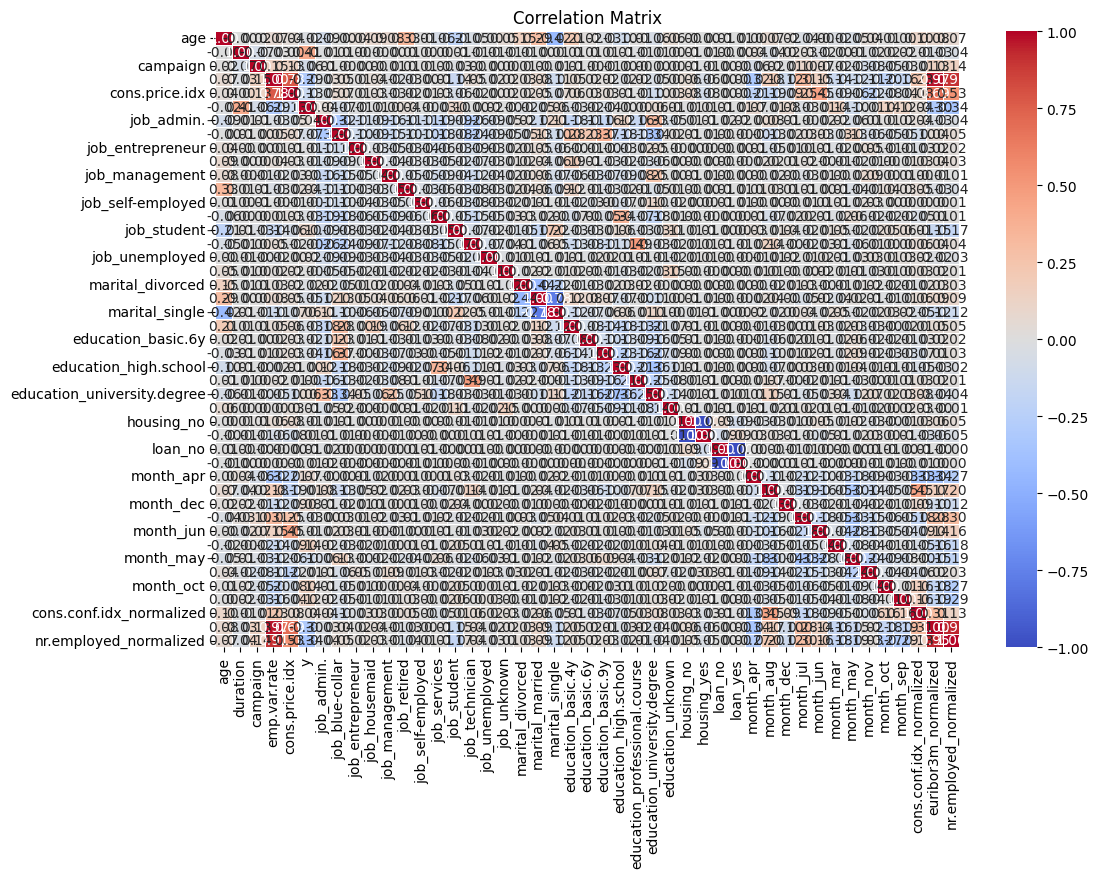

In [350]:
# 4. Correlation Matrix for Numeric Features
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [351]:
# 5. Check for Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])



Missing Values in Each Column:
Series([], dtype: int64)


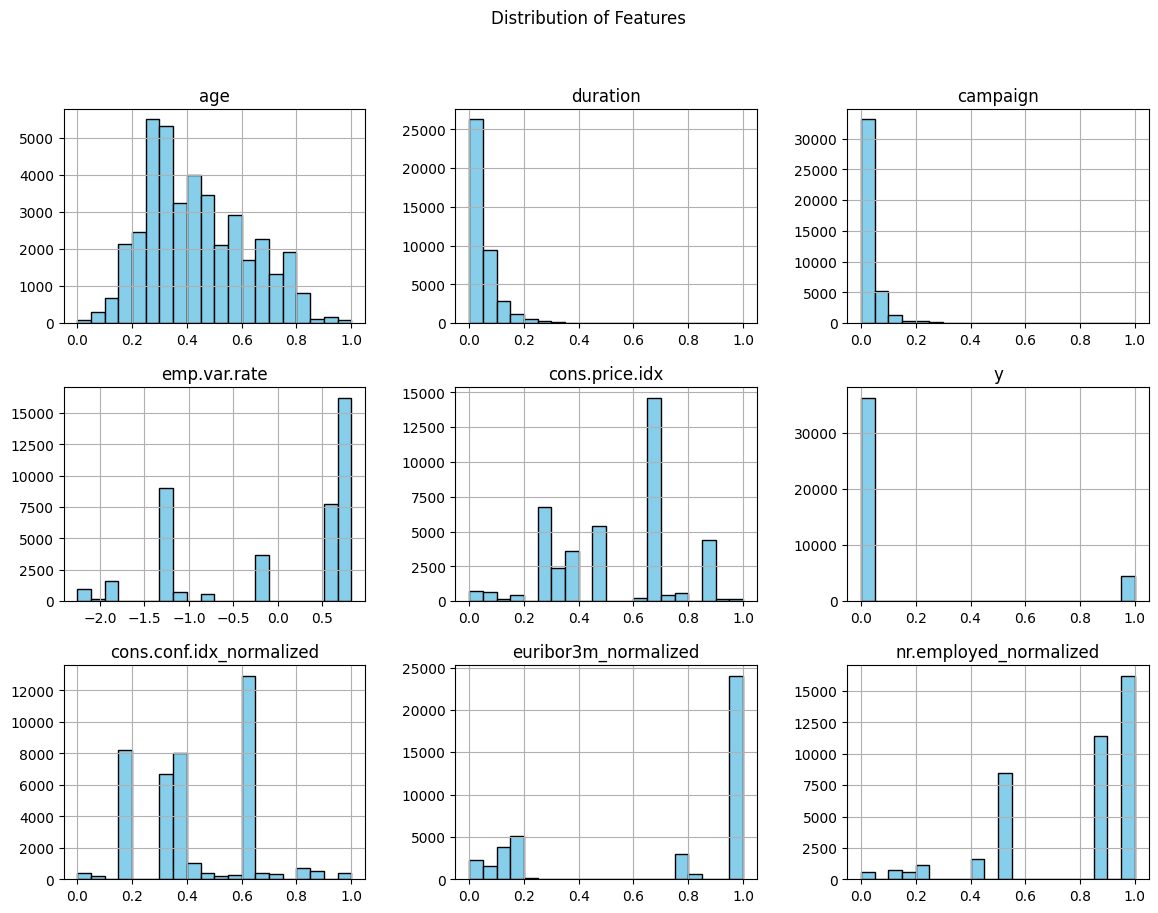

In [354]:
# 6. Distribution of the Features (Histograms)
data.hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Features')
plt.show()


In [ ]:
# 7. Pairplot to Visualize Relationships Between Features
sns.pairplot(data, hue='y', palette='coolwarm')
plt.suptitle('Pairplot of Features with Target Variable', y=1.02)
plt.show()


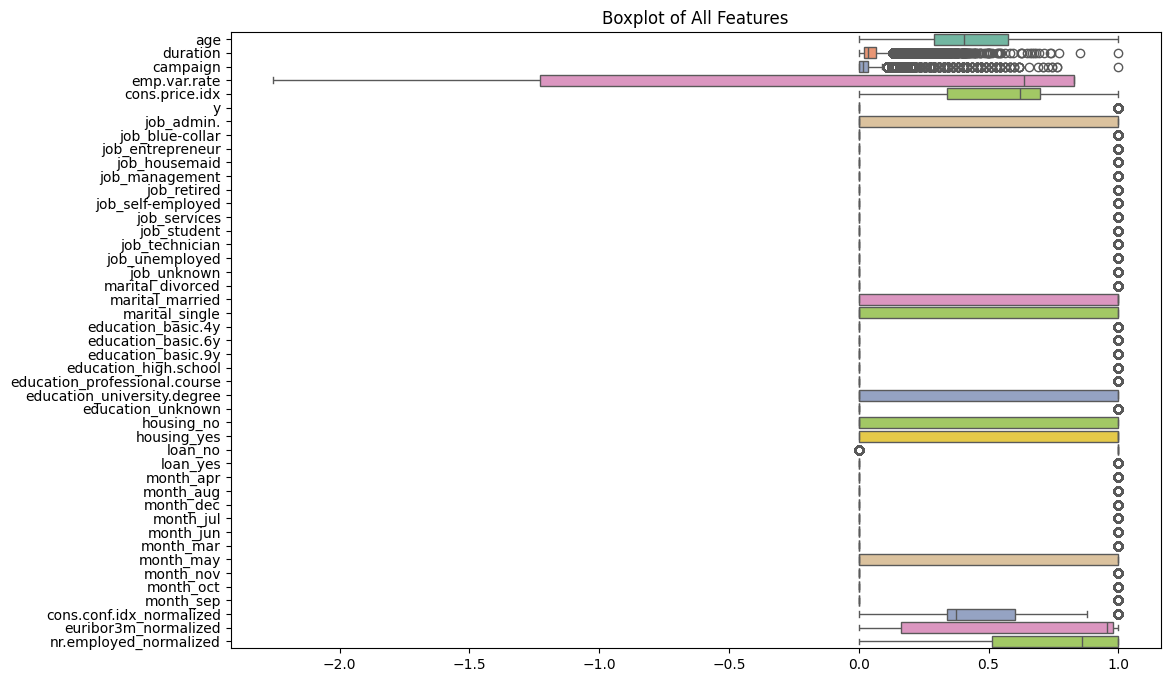

In [352]:
# 8. Boxplot to Check for Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='h', palette='Set2')
plt.title("Boxplot of All Features")
plt.show()


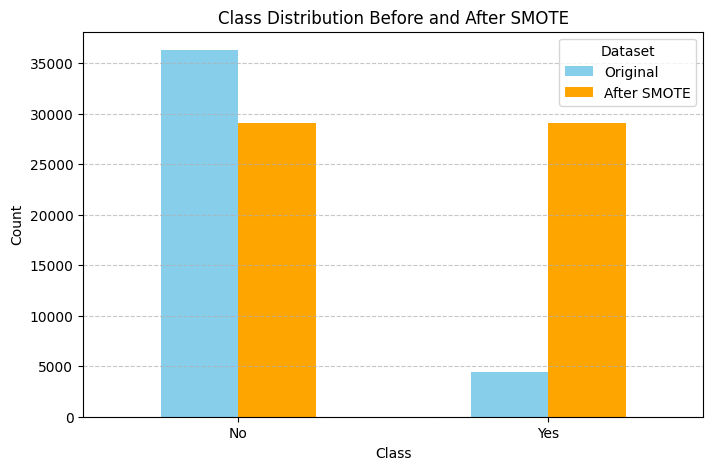

In [353]:
# 9. Class Distribution Plot (Before and After SMOTE)
df_class_distribution = pd.DataFrame({
    'Class': ['No', 'Yes'],
    'Original': [Counter(y)[0], Counter(y)[1]],
    'After SMOTE': [Counter(y_train_resampled)[0], Counter(y_train_resampled)[1]]
})

df_class_distribution.set_index('Class').plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('Class Distribution Before and After SMOTE')
plt.ylabel('Count')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Dataset')
plt.show()


# **Train Model**

# **Evaluate the Model**

# **Optimize the Model**

# **Evaluate the Model**

# **Deploy the Mode**